In [41]:
import csv
import cv2
import numpy as np
import os
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

print(os.getcwd())

#file = (r'C:\Users\Ale\Desktop\Self Driving Car\03BehaviouralCloning\data')
#dir_path = os.path.dirname(os.path.realpath(file))

C:\Users\lehoa\OneDrive\Desktop\Behavioral-Cloning-project-3-Term1-Self-Driving-Car-Udacity


#### plot an example image

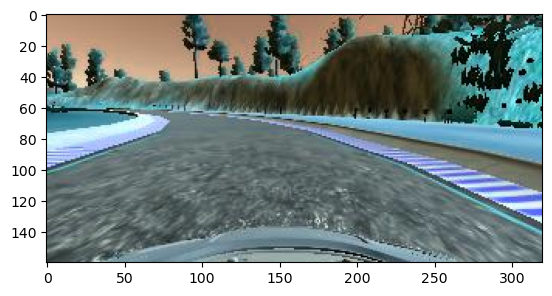

In [44]:
# Load the image using cv2.imread()
image_path = r"C:\Users\lehoa\OneDrive\Desktop\Behavioral-Cloning-project-3-Term1-Self-Driving-Car-Udacity\data\IMG\center_2023_08_03_20_25_40_599.jpg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.show()

### Collecting images

In [52]:
import csv
import cv2

lines = []
with open("data/driving_log.csv") as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

images = []
measurements = []
for line in lines:
    for i in range(3):
        source_path = line[i]
        filename = source_path.split('\\')[-1]
        current_path = "data/IMG/" + filename  # Add the path prefix to the filename
        #print(current_path)
        # clean_string = ''.join(current_path.split())
        # print(clean_string)
        img = cv2.imread(current_path)

        # Check if the image was read properly
        if img is not None:
            image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # print(image)
            images.append(image)
            measurement = float(line[3])
            if i == 1:
                measurement = measurement + 0.2
            elif i == 2:
                measurement = measurement - 0.2
            else:
                measurement = measurement
            measurements.append(measurement)
        else:
            print("Error: Unable to read the image at path", current_path)

# Now you should have the images and corresponding measurements in 'images' and 'measurements' lists.


In [50]:
print(len(lines))
print(len(images))
print(len(measurements))

1821
5463
5463


### Deleting 80% of the data with steering angle equal to: 0.2, 0 and -0.2

In [53]:
zero=0
zeros=[]
remain=[]
p=0
toomuch=[-0.2,0,0.2]
for i in range (0,len(images)):
    if measurements[i] in toomuch:
        zero=zero+1
        if zero%5==0:
            remain.append(i)
        else:
            zeros.append(i)
        
for index in range (0,len(zeros)-p):
    #np.delete(images,(zeros[index]-p))
    #np.delete()
    images.pop(zeros[index]-p)
    measurements.pop(zeros[index]-p)
    p=p+1
    
len(images)

2206

### Plot distribution measurements

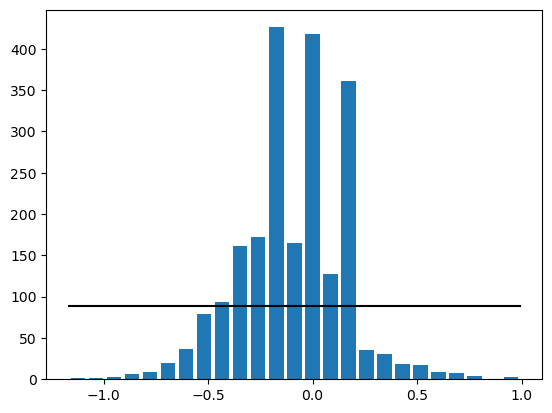

In [54]:
num_bins = 25
avg_samples_per_bin = len(measurements)/num_bins
hist, bins = np.histogram(measurements, num_bins)
center = (bins[:-1] + bins[1:]) / 2
width = 0.8*(bins[1] - bins[0])
# print histogram again to show more even distribution of steering angles
hist, bins = np.histogram(measurements, num_bins)
plt.bar(center, hist, align='center', width=width)
plt.plot((np.min(measurements), np.max(measurements)), (avg_samples_per_bin, avg_samples_per_bin), 'k-')
plt.show()


### Augmenting images

In [55]:
augmented_images, augmented_measurements=[], []
for image, measurement in zip(images,measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append(measurement*-1.0)
    
X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)

In [56]:
print(X_train.shape)
print(y_train.shape)

(4412, 160, 320, 3)
(4412,)


#### Example of a flipped image

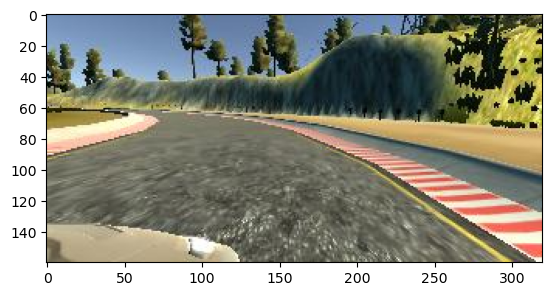

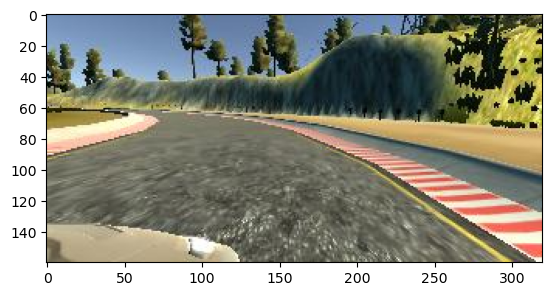

In [57]:
plt.imshow(images[2])
plt.show()
plt.imshow(augmented_images[4])
plt.show()

# Final model

In [58]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160, 320, 3)))
model.add(Cropping2D(cropping=((70, 25), (0, 0))))
model.add(Conv2D(24, (5, 5), strides=(2, 2), activation="relu"))
model.add(Conv2D(36, (5, 5), strides=(2, 2), activation="relu"))
model.add(Conv2D(48, (5, 5), strides=(2, 2), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dropout(0.75, noise_shape=None, seed=None))
model.add(Dense(100))
model.add(Dropout(0.75, noise_shape=None, seed=None))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=7)

model.save('model.h5')
print("model saved")


Epoch 1/7
111/111 [==============================] - 24s 206ms/step - loss: 0.0593 - val_loss: 0.0551
Epoch 2/7
111/111 [==============================] - 21s 185ms/step - loss: 0.0449 - val_loss: 0.0497
Epoch 3/7
111/111 [==============================] - 30s 271ms/step - loss: 0.0400 - val_loss: 0.0509
Epoch 4/7
111/111 [==============================] - 26s 235ms/step - loss: 0.0388 - val_loss: 0.0404
Epoch 5/7
111/111 [==============================] - 21s 193ms/step - loss: 0.0356 - val_loss: 0.0423
Epoch 6/7
111/111 [==============================] - 21s 185ms/step - loss: 0.0353 - val_loss: 0.0408
Epoch 7/7
111/111 [==============================] - 23s 208ms/step - loss: 0.0341 - val_loss: 0.0410
model saved
